TALLER 3:
Juan José Toro Villegas CC. 1017271652

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs"
precios = pd.read_csv(url)
precios

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
9238,Yuca*,santa,n.d.,n.d.,29ago2023,NaN,NaN


DATOS FALTANTES

In [2]:
precios.isnull().any()

producto        False
ciudad          False
precio          False
variabilidad    False
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool

In [ ]:
#Solo las variables longitud y latitud presentan datos faltantes

In [3]:
# Imprime los valores faltantes de cada columna
print(precios.isnull().sum())

producto           0
ciudad             0
precio             0
variabilidad       0
fecha              0
LATITUD         2135
LONGITUD        2135
dtype: int64


In [ ]:
#presentan un total de 2135 cada una

In [4]:
# Calcula el porcentaje de datos faltantes en cada columna
missing_percentageP = (precios.isnull().mean() * 100).round(2)
missing_percentageP

producto         0.00
ciudad           0.00
precio           0.00
variabilidad     0.00
fecha            0.00
LATITUD         23.11
LONGITUD        23.11
dtype: float64

In [ ]:
#Ambas tambien presentan igual porcentaje de datos faltantes, cada una con 23,11%

In [5]:
# Muestra los valores faltantes de todo el dataframe
precios.isnull()

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False
9236,False,False,False,False,False,False,False
9237,False,False,False,False,False,False,False
9238,False,False,False,False,False,True,True


In [ ]:
#Debido a que tenemos muchos datos, se decidio eliminar las filas con al menos un dato faltante

In [6]:
# Elimina filas con al menos un valor faltante
Precios=precios.dropna()
Precios

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591
...,...,...,...,...,...,...,...
9234,Yuca*,ibagué,n.d.,n.d.,29ago2023,4.451921,-75.252591
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791


In [ ]:
#Vemos que se eliminaron, sin embargo hay algunos datos "n.d.", miremos cuales son esas variables

In [7]:
valor_a_buscar = 'n.d.'

# Verifica las columnas que contienen 'n.d.'
columnas_con_nd = Precios.apply(lambda column: any(column == valor_a_buscar))

# Muestra las columnas que contienen 'n.d.'
columnas_con_nd = columnas_con_nd[columnas_con_nd].index
print("Columnas con 'n.d.':")
print(columnas_con_nd)

Columnas con 'n.d.':
Index(['precio', 'variabilidad'], dtype='object')


In [ ]:
#Tienen n.d. dos de las columnas, precio y variabilidad

In [ ]:
#Para "precio", se decide imputar con la variable anterior

In [8]:
# Reemplaza 'n.d.' con NaN para facilitar el procesamiento
Precios['precio'].replace('n.d.', float('nan'), inplace=True)

# Llena los valores faltantes en 'precio' con el dato anterior
Precios['precio'].fillna(method='ffill', inplace=True)

Precios


<ipython-input-8-5422c14e778b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['precio'].replace('n.d.', float('nan'), inplace=True)
<ipython-input-8-5422c14e778b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['precio'].fillna(method='ffill', inplace=True)


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591
...,...,...,...,...,...,...,...
9234,Yuca*,ibagué,2690,n.d.,29ago2023,4.451921,-75.252591
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,1650,n.d.,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791


In [ ]:
#se comprueba ahora quien posee datos n.d.

In [9]:
valor_a_buscar = 'n.d.'

# Verifica las columnas que contienen 'n.d.'
columnas_con_nd = Precios.apply(lambda column: any(column == valor_a_buscar))

# Muestra las columnas que contienen 'n.d.'
columnas_con_nd = columnas_con_nd[columnas_con_nd].index
print("Columnas con 'n.d.':")
print(columnas_con_nd)

Columnas con 'n.d.':
Index(['variabilidad'], dtype='object')


In [10]:
# Reemplaza 'n.d.' con 0 en la columna 'variabilidad'
Precios['variabilidad'].replace('n.d.', 0, inplace=True)

<ipython-input-10-3ba72c8edf40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['variabilidad'].replace('n.d.', 0, inplace=True)


In [ ]:
#Se imputaron los datos n.d. de variabilidad con un 0

In [11]:
Precios

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591
...,...,...,...,...,...,...,...
9234,Yuca*,ibagué,2690,0,29ago2023,4.451921,-75.252591
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,1650,0,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791


**Datos Duplicados**

In [12]:
# Identificar filas duplicadas
duplicadosP = Precios.duplicated()

# Imprimir las filas duplicadas
print(duplicadosP)

0       False
1       False
3       False
4       False
6       False
        ...  
9234    False
9235    False
9236    False
9237    False
9239    False
Length: 7105, dtype: bool


In [ ]:
#Vemos que no hay datos duplicados

**Outliers**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Usar la función describe para identificar diferencias entre las medidas descriptivas
Precios['precio'].describe()

count     7105
unique    1392
top       4000
freq        93
Name: precio, dtype: object

**Redefinimos el tipo de dato**

In [15]:
# Convierte la columna 'precio' a tipo numérico (si aún no lo es)
Precios['precio'] = pd.to_numeric(Precios['precio'], errors='coerce')

<ipython-input-15-5976d5102650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['precio'] = pd.to_numeric(Precios['precio'], errors='coerce')


In [18]:
# Convierte la columna 'precio' a tipo numérico (si aún no lo es)
Precios['variabilidad'] = pd.to_numeric(Precios['variabilidad'], errors='coerce')

<ipython-input-18-68b9894be389>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['variabilidad'] = pd.to_numeric(Precios['variabilidad'], errors='coerce')


Text(0.5, 0, 'precio pdto')

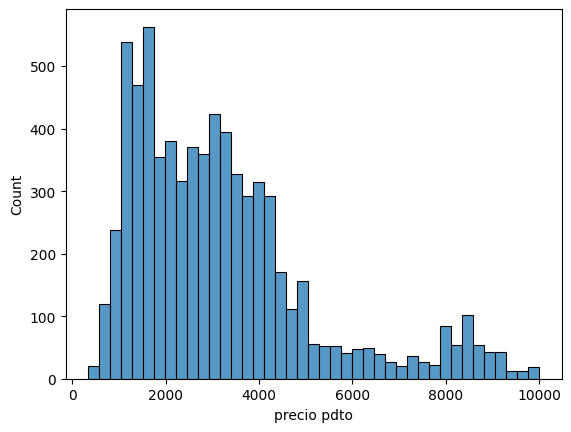

In [16]:
# Crear un histograma usando Seaborn
fig = sns.histplot(data = Precios, x = 'precio')
# Adicionar nombres a ejes
fig.set_xlabel('precio pdto')

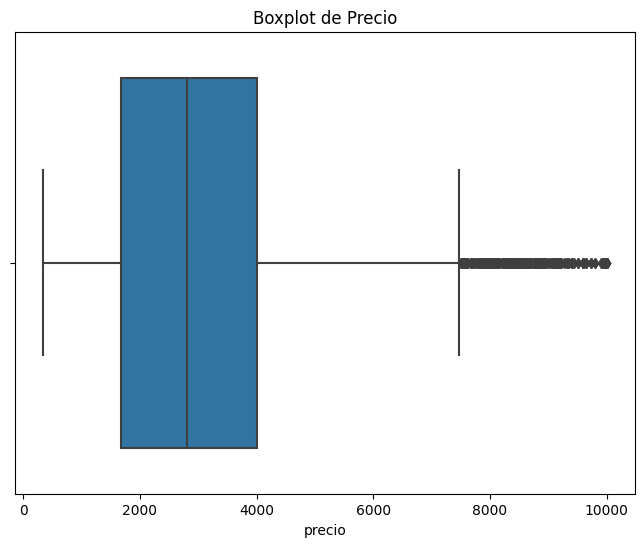

In [17]:
# Crea un boxplot de la columna 'precio'
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='precio', data=Precios)

# Muestra el gráfico
plt.title('Boxplot de Precio')
plt.show()

In [ ]:
#Vemos que hay presencia de datos que se salen de los limites del boxplot, sin embargo no hay presencia de datos atipicos, ya que hay gran cantidad entre 7000 y 100000

**Estandarizacion y Normalizacion no necesarias**

In [ ]:
#No se requiere estandarización o normalización, ya que la mayoría de las variables son categóricas o nominales, no continuas.
#La estandarización y normalización son usadas en variables numéricas continuas para permitir comparaciones significativas al igualar sus escalas.

**Categorizacion**

In [19]:
# Verifica si alguna fila contiene un valor igual a 0
informacion = ['Incompleto' if 0 in row.values else 'Completo' for _, row in Precios.iterrows()]

# Agrega la columna 'Informacion' al DataFrame
Precios['Informacion'] = informacion

<ipython-input-19-5298025ab027>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['Informacion'] = informacion


In [ ]:
#Se crea una nueva columna, que me diga si la informacion esta completa o incompleta, esto si en alguna de sus filas hay un valor 0.

In [20]:
Precios

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Informacion
0,Arveja verde en vaina,armenia,7200,0.10,01ago2023,6.163684,-75.809955,Completo
1,Arveja verde en vaina,armenia,7200,0.10,01ago2023,4.499501,-75.724900,Completo
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570,Completo
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493,Completo
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591,Completo
...,...,...,...,...,...,...,...,...
9234,Yuca*,ibagué,2690,0.00,29ago2023,4.451921,-75.252591,Incompleto
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031,Completo
9236,Yuca*,neiva,1650,0.00,29ago2023,2.993360,-75.272362,Incompleto
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791,Completo


In [21]:
# Calcular el valor mínimo, máximo y la media de la columna 'precio'
valor_minimo = Precios['precio'].min()
valor_maximo = Precios['precio'].max()
media = Precios['precio'].mean()

print("Valor Mínimo:", valor_minimo)
print("Valor Máximo:", valor_maximo)
print("Media:", media)


Valor Mínimo: 339
Valor Máximo: 10000
Media: 3187.186629134412


In [22]:
import math

# Definir los limites de los intervalos y nombres de categorias
valores = [-math.inf, 3000, 6000, math.inf]
categorias = ['Muy economico', 'Moderado', 'Alto']

# Obtener las categorias
Precios['tipo de pdto'] = pd.cut(Precios['precio'], bins = valores, labels = categorias)
Precios.head()


<ipython-input-22-f5ae9563c02b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Precios['tipo de pdto'] = pd.cut(Precios['precio'], bins = valores, labels = categorias)


,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Informacion,tipo de pdto
0,Arveja verde en vaina,armenia,7200,0.10,01ago2023,6.163684,-75.809955,Completo,Alto
1,Arveja verde en vaina,armenia,7200,0.10,01ago2023,4.499501,-75.724900,Completo,Alto
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570,Completo,Alto
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493,Completo,Alto
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591,Completo,Moderado


**Preguntas con Filtrado**

In [24]:
#1) Cuales productos se denominan altos o costosos?
productos_altos = Precios[Precios['tipo de pdto'] == 'Alto']

print(productos_altos[['producto']])

                   producto
0     Arveja verde en vaina
1     Arveja verde en vaina
3     Arveja verde en vaina
4     Arveja verde en vaina
9     Arveja verde en vaina
...                     ...
9090     Manzana royal gala
9091     Manzana royal gala
9092     Manzana royal gala
9093     Manzana royal gala
9095     Manzana royal gala

[673 rows x 1 columns]


In [25]:
#2) Productos de precio superior a 9000 pesos
df_Precio = Precios[Precios['precio'] > 9000]
df_Precio

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,Informacion,tipo de pdto
270,Manzana royal gala,ibagué,9386,0.09,01ago2023,4.451921,-75.252591,Completo,Alto
272,Manzana royal gala,neiva,9158,0.00,01ago2023,2.993360,-75.272362,Incompleto,Alto
273,Manzana royal gala,pereira,9158,0.00,01ago2023,4.803663,-75.795791,Incompleto,Alto
420,Arveja verde en vaina,barranquilla,9967,0.00,02ago2023,10.981521,-74.827715,Incompleto,Alto
678,Mango tommy,pereira,9400,0.03,02ago2023,4.803663,-75.795791,Completo,Alto
...,...,...,...,...,...,...,...,...,...
8614,Mango tommy,cali,9200,-0.04,28ago2023,3.399044,-76.576493,Completo,Alto
8823,Arveja verde en vaina,bucaramanga,9300,0.02,29ago2023,7.155834,-73.111570,Completo,Alto
9090,Manzana royal gala,ibagué,9123,0.00,29ago2023,4.451921,-75.252591,Incompleto,Alto
9092,Manzana royal gala,neiva,9079,0.00,29ago2023,2.993360,-75.272362,Incompleto,Alto


In [29]:
#3)Cuales productos se denominan muy economicos?
productos_econom = Precios[Precios['tipo de pdto'] == 'Muy economico']

print(productos_econom[['producto']])

                     producto
12    Cebolla cabezona blanca
13    Cebolla cabezona blanca
15    Cebolla cabezona blanca
16    Cebolla cabezona blanca
18    Cebolla cabezona blanca
...                       ...
9234                    Yuca*
9235                    Yuca*
9236                    Yuca*
9237                    Yuca*
9239                    Yuca*

[3891 rows x 1 columns]


In [30]:
#4) Cual sera la frecuencia de cada tipo de producto?
frecuencia_por_tipo = Precios['tipo de pdto'].value_counts()

# Imprimir las frecuencias
print(frecuencia_por_tipo)

Muy economico    3891
Moderado         2541
Alto              673
Name: tipo de pdto, dtype: int64


In [32]:
#5) Que productos presentan variabilidad negativa y en que ciudad?
productos_con_variabilidad_negativa = Precios[Precios['variabilidad'] < 0]

# Imprimir los nombres de los productos y las ciudades con variabilidad negativa
for index, row in productos_con_variabilidad_negativa.iterrows():
    print(f"Producto: {row['producto']}, Ciudad: {row['ciudad']}")

Producto: Arveja verde en vaina, Ciudad: cali
Producto: Arveja verde en vaina, Ciudad: ibagué
Producto: Arveja verde en vaina, Ciudad: neiva
Producto: Arveja verde en vaina, Ciudad: tunja
Producto: Cebolla cabezona blanca, Ciudad: cali
Producto: Cebolla cabezona blanca, Ciudad: ibagué
Producto: Cebolla cabezona blanca, Ciudad: medellín
Producto: Cebolla cabezona blanca, Ciudad: pereira
Producto: Cebolla cabezona blanca, Ciudad: tunja
Producto: Chócolo mazorca, Ciudad: cali
Producto: Fríjol verde*, Ciudad: ibagué
Producto: Fríjol verde*, Ciudad: neiva
Producto: Fríjol verde*, Ciudad: tunja
Producto: Habichuela, Ciudad: ibagué
Producto: Habichuela, Ciudad: neiva
Producto: Habichuela, Ciudad: tunja
Producto: Lechuga batavia, Ciudad: medellín
Producto: Lechuga batavia, Ciudad: tunja
Producto: Pepino cohombro, Ciudad: ibagué
Producto: Pepino cohombro, Ciudad: neiva
Producto: Pepino cohombro, Ciudad: pereira
Producto: Pepino cohombro, Ciudad: tunja
Producto: Pimentón, Ciudad: cali
Producto: 

**Graficos**

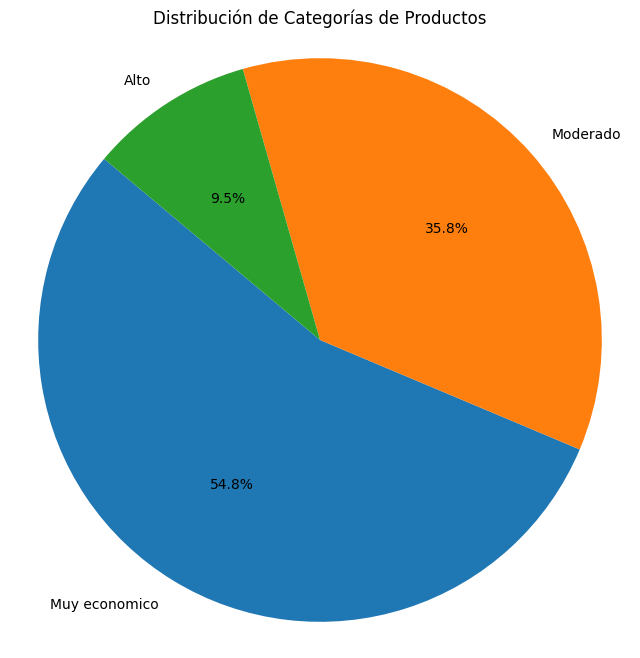

In [34]:
frecuencia_por_tipo = Precios['tipo de pdto'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_por_tipo, labels=frecuencia_por_tipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorías de Productos')
plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo

# Mostrar el gráfico
plt.show()

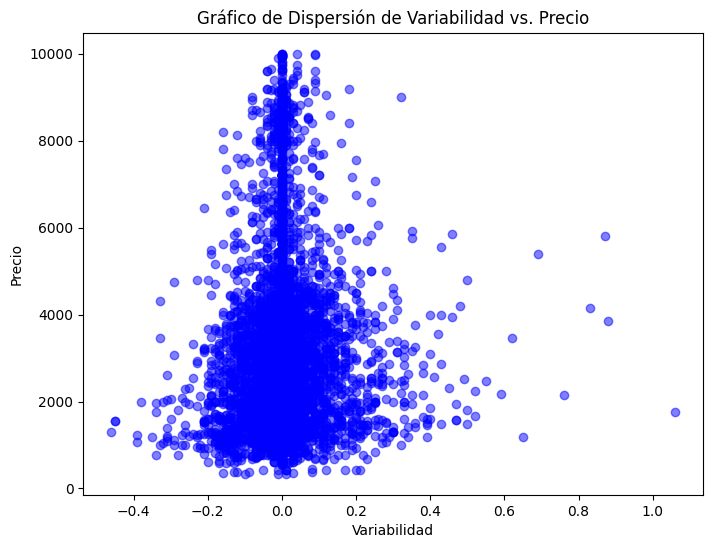

In [35]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(Precios['variabilidad'], Precios['precio'], alpha=0.5, color='b')
plt.title('Gráfico de Dispersión de Variabilidad vs. Precio')
plt.xlabel('Variabilidad')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()


<ipython-input-36-63bfbbcf6e81>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = Precios.corr()


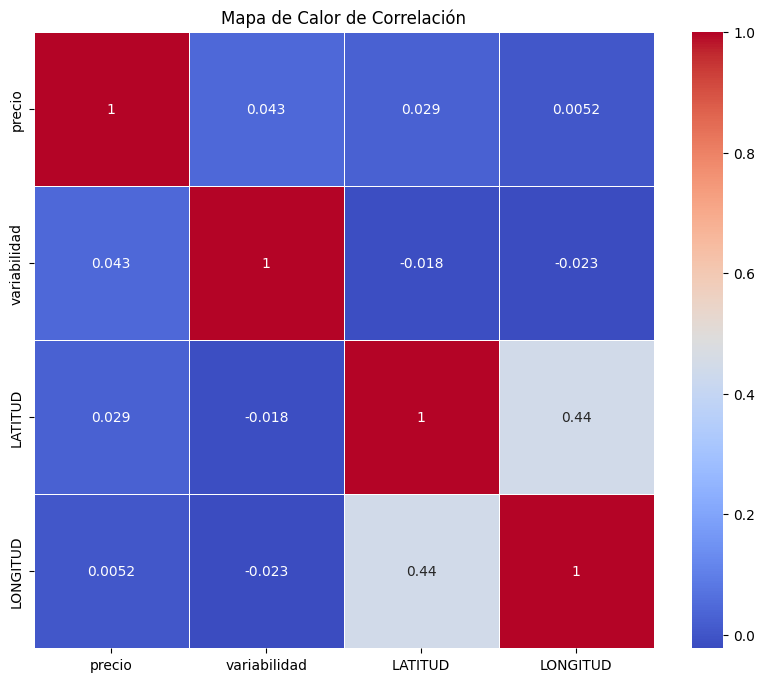

In [36]:
import seaborn as sns

# Calcular la matriz de correlación
correlacion = Precios.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


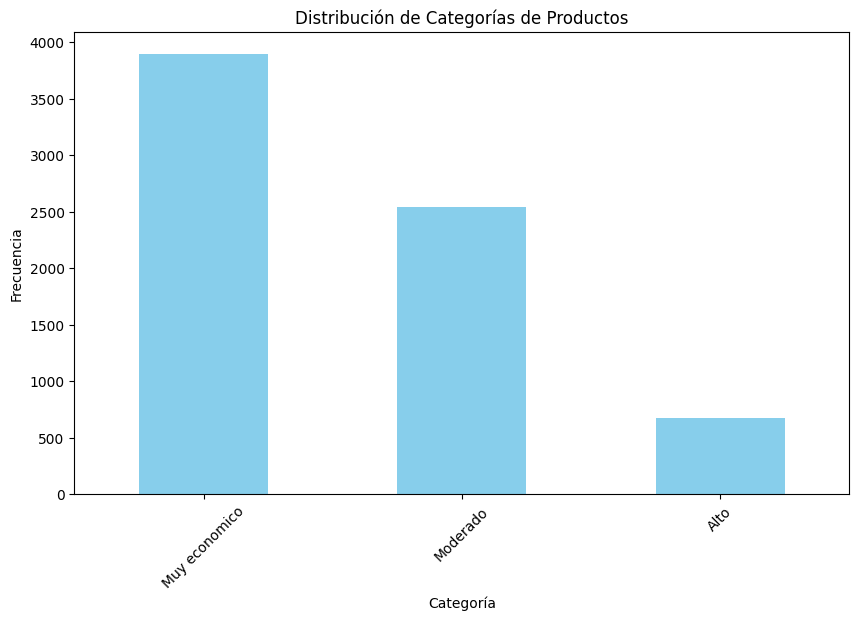

In [37]:
frecuencia_por_tipo = Precios['tipo de pdto'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_por_tipo.plot(kind='bar', color='skyblue')
plt.title('Distribución de Categorías de Productos')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Mostrar el gráfico de barras
plt.show()

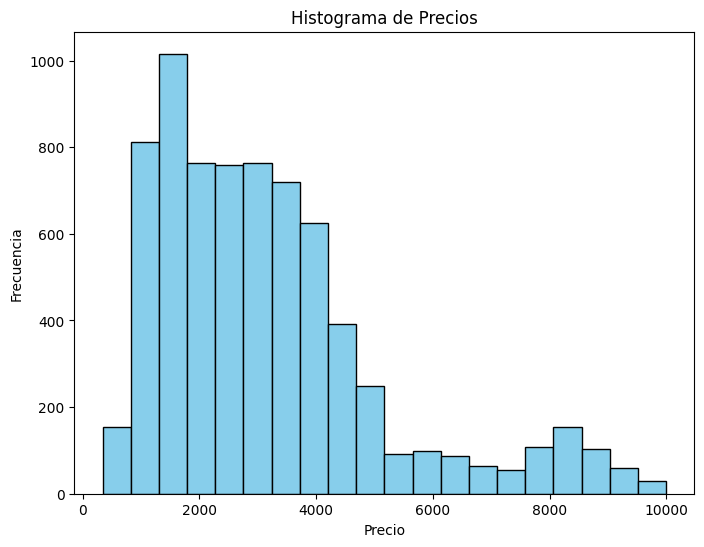

In [38]:
# Histograma
plt.figure(figsize=(8, 6))
plt.hist(Precios['precio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()